In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date[0])

2017-08-23


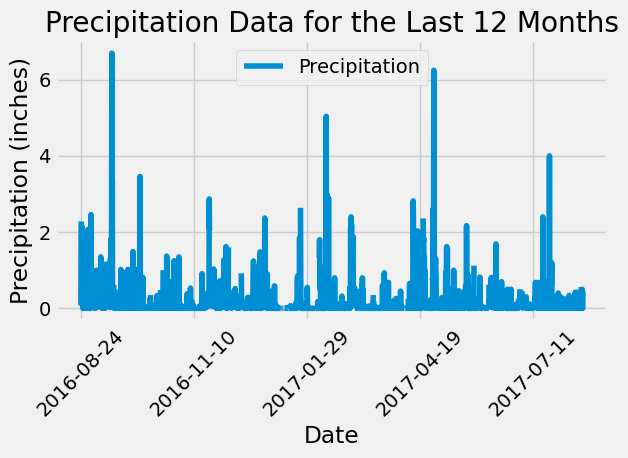

In [25]:
# Calculate the date one year from the last date in the dataset.
date_str = most_recent_date[0]
date_object = dt.datetime.strptime(date_str, '%Y-%m-%d')
one_year_ago = date_object - dt.timedelta(days=365)
formatted_result = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
date = session.query(measurement.date, measurement.prcp).filter(measurement.date > formatted_result).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date, columns=['Dates', 'Precipitation'])

# Sort the DataFrame by date
df_dates = df.sort_values(by='Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Dates')
df_dates.plot(x='Dates', grid=True)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data for the Last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(measurement.station))).scalar()
print(total_stations)

9


In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ordered_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
ordered_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(result)

[(54.0, 85.0, 71.66378066378067)]


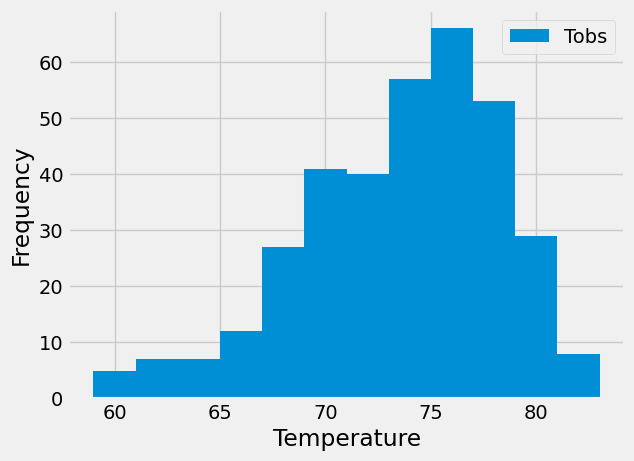

In [38]:
last_date = session.query(measurement.date).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()
results = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= formatted_result).all()
df = pd.DataFrame(results, columns=['Tobs'])

# Plotting the histogram
plt.hist(df['Tobs'], bins=12, label='Tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [33]:
# Close Session
session.close()